# ATIVIDADE CIÊNCIA DE DADOS

### Aluna: Laís Dagnésia Lopes Lessa

## ATIVIDADE 1

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [157]:
# Base Breast Cancer
cancer = load_breast_cancer()
df_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df_cancer['target'] = cancer.target

# Base Diabetes
diabetes = load_diabetes()
df_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df_diabetes['target'] = diabetes.target


df_cancer.head(), df_diabetes.head()

(   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 0        17.99         10.38          122.80     1001.0          0.11840   
 1        20.57         17.77          132.90     1326.0          0.08474   
 2        19.69         21.25          130.00     1203.0          0.10960   
 3        11.42         20.38           77.58      386.1          0.14250   
 4        20.29         14.34          135.10     1297.0          0.10030   
 
    mean compactness  mean concavity  mean concave points  mean symmetry  \
 0           0.27760          0.3001              0.14710         0.2419   
 1           0.07864          0.0869              0.07017         0.1812   
 2           0.15990          0.1974              0.12790         0.2069   
 3           0.28390          0.2414              0.10520         0.2597   
 4           0.13280          0.1980              0.10430         0.1809   
 
    mean fractal dimension  ...  worst texture  worst perimeter  worst area  \

In [158]:
# Analise descritiva

print("Cancer de Mama:")
print(df_cancer.info())
print(df_cancer.describe())

print("\nDiabetes:")
print(df_diabetes.info())
print(df_diabetes.describe())


Cancer de Mama:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness

In [159]:
# valores nulos

print("Breast Cancer - nulos:")
print(df_cancer.isnull().sum())

print("\nDiabetes - nulos:")
print(df_diabetes.isnull().sum())


Breast Cancer - nulos:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Diabetes - nulos:
age       0
sex       0
bmi       0
bp        

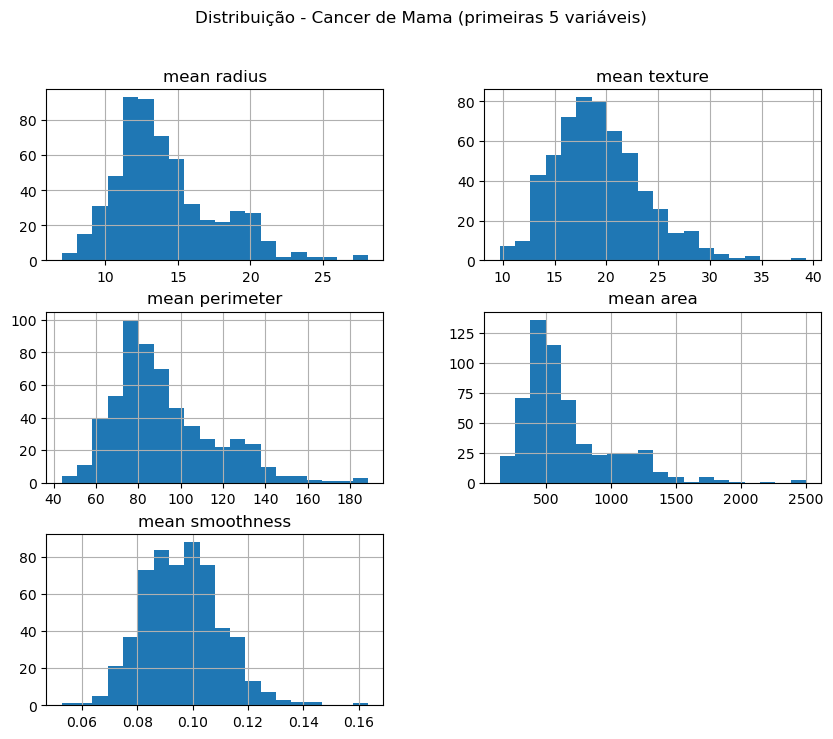

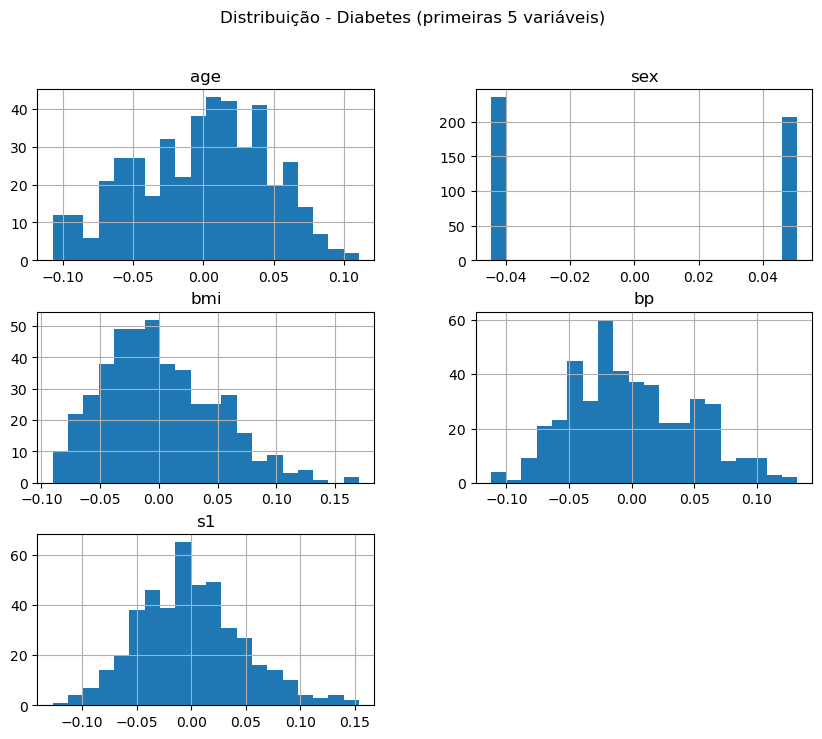

In [160]:
# distribuicoes de valores 

df_cancer.iloc[:,:5].hist(figsize=(10,8), bins=20)
plt.suptitle("Distribuição - Cancer de Mama (primeiras 5 variáveis)")
plt.show()

df_diabetes.iloc[:,:5].hist(figsize=(10,8), bins=20)
plt.suptitle("Distribuição - Diabetes (primeiras 5 variáveis)")
plt.show()



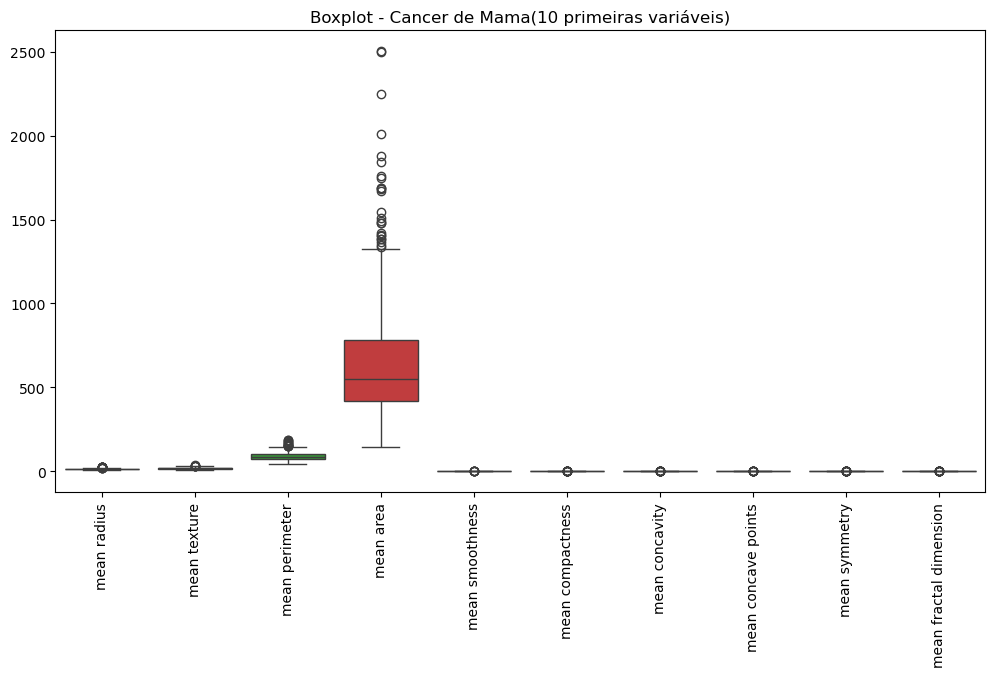

In [161]:
# Boxplot para ver outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df_cancer.iloc[:,:10])
plt.xticks(rotation=90)
plt.title("Boxplot - Cancer de Mama(10 primeiras variáveis)")
plt.show()

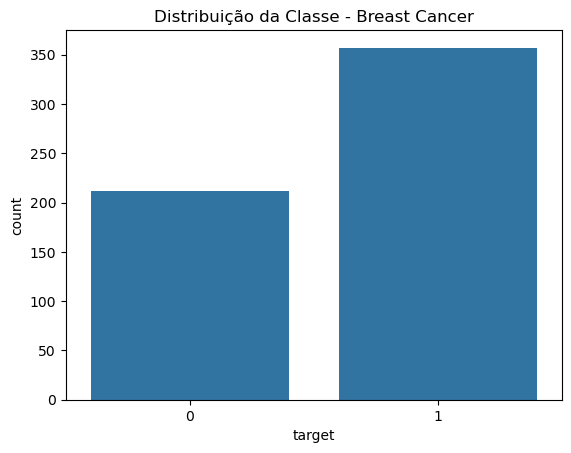

target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


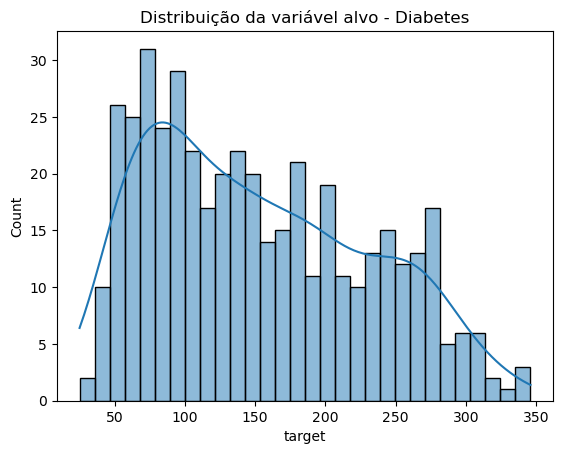

In [162]:
# baleceamento da variavel

# Breast Cancer - classificação binária
sns.countplot(x='target', data=df_cancer)
plt.title("Distribuição da Classe - Breast Cancer")
plt.show()
print(df_cancer['target'].value_counts(normalize=True))

# Diabetes - variável contínua (regressão)
sns.histplot(df_diabetes['target'], bins=30, kde=True)
plt.title("Distribuição da variável alvo - Diabetes")
plt.show()


###### Cancer de Mama é relativamente balanceado (mas tende a ter um pouco mais de uma classe).

###### Diabetes (target contínuo) segue uma distribuição quase normal, mas com leve assimetria.

In [164]:
# normalizacao

scaler = StandardScaler()
X_cancer_scaled = scaler.fit_transform(df_cancer.drop('target', axis=1))
X_diabetes_scaled = scaler.fit_transform(df_diabetes.drop('target', axis=1))

print("Escalas após normalização:")
print("Cancer de mama:", X_cancer_scaled.shape)
print("Diabetes:", X_diabetes_scaled.shape)


Escalas após normalização:
Cancer de mama: (569, 30)
Diabetes: (442, 10)


### BASES E CLASSIFICAÇÃO

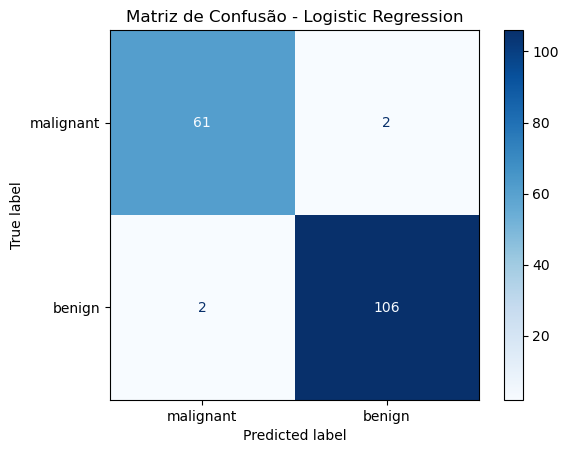

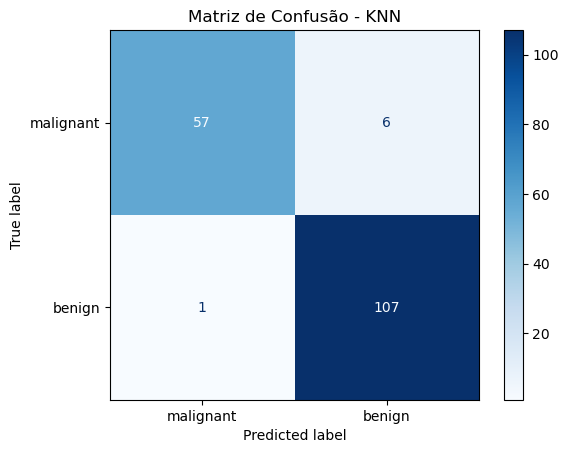

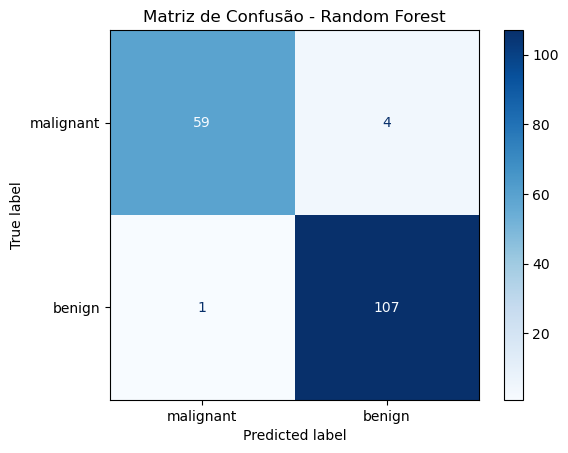

,Modelo,Accuracy,F1
0,Logistic Regression,0.976608,0.981481
1,KNN,0.959064,0.968326
2,Random Forest,0.970760,0.977169


In [166]:
# Cancer
cancer = load_breast_cancer()
X_cancer, y_cancer = cancer.data, cancer.target
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cancer, y_cancer, test_size=0.3, random_state=42)

# Diabetes
diabetes = load_diabetes()
X_diabetes, y_diabetes = diabetes.data, diabetes.target
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=0.3, random_state=42)



classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

results_classification = []

for name, clf in classifiers.items():
    clf.fit(X_train_c, y_train_c)
    y_pred = clf.predict(X_test_c)
    acc = accuracy_score(y_test_c, y_pred)
    f1 = f1_score(y_test_c, y_pred)
    results_classification.append([name, acc, f1])
    
    # Matriz de confusão
    cm = confusion_matrix(y_test_c, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cancer.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()

df_results_classification = pd.DataFrame(results_classification, columns=["Modelo","Accuracy","F1"])
df_results_classification


### Regressão

In [181]:
regressors = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "SVR": SVR()
}

results_regression = []

for name, reg in regressors.items():
    reg.fit(X_train_d, y_train_d)
    y_pred = reg.predict(X_test_d)
    mse = mean_squared_error(y_test_d, y_pred)
    r2 = r2_score(y_test_d, y_pred)
    results_regression.append([name, mse, r2])

df_results_regression = pd.DataFrame(results_regression, columns=["Modelo","MSE","R2"])
df_results_regression


,Modelo,MSE,R2
0,Linear Regression,2821.750981,0.477290
1,Random Forest Regressor,2859.641983,0.470271
2,SVR,4525.810200,0.161624


#### Treinamento de 3 classificadores no Breast Cancer (Logistic Regression, KNN, Random Forest)

Avaliação com Accuracy e F1-score

Exibição de Matrizes de Confusão para cada modelo

Treinamento de 3 regressores no Diabetes (Linear Regression, Random Forest Regressor, SVR)

Avaliação com MSE e R²

Comparação em tabelas e análise dos resultado

## ATIVIDADE 2 - Website Phishing

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest, mutual_info_classif

from read_phishing import load_phishing



### 1) Leitura dos dados

In [190]:
df = load_phishing("PhishingData.arff")

print(df.shape)

print("Shape:", df.shape)
display(df.head())

(1353, 10)
Shape: (1353, 10)


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,class
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


### 2) Análise exploratória

In [199]:
print("Tipos de dados e contagens de nulos:\n")
print(df.info())
print("\nResumo estatístico:\n")
display(df.describe(include='all'))

assert df.columns[-1] == 'class', "A última coluna deve ser a classe (renomeie para 'class')."

nulos = df.isnull().sum()
unicos = df.nunique()
resumo = pd.DataFrame({'nulos': nulos, 'valores_unicos': unicos})
display(resumo)


Tipos de dados e contagens de nulos:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SFH                1353 non-null   object
 1   popUpWidnow        1353 non-null   object
 2   SSLfinal_State     1353 non-null   object
 3   Request_URL        1353 non-null   object
 4   URL_of_Anchor      1353 non-null   object
 5   web_traffic        1353 non-null   object
 6   URL_Length         1353 non-null   object
 7   age_of_domain      1353 non-null   object
 8   having_IP_Address  1353 non-null   object
 9   class              1353 non-null   object
dtypes: object(10)
memory usage: 105.8+ KB
None

Resumo estatístico:



,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,class
count,1353,1353,1353,1353,1353,1353,1353,1353,1353,1353
unique,3,3,3,3,3,3,3,2,2,3
top,1,0,1,-1,-1,0,0,1,0,-1
freq,767,639,751,617,610,473,563,825,1198,702


,nulos,valores_unicos
SFH,0,3
popUpWidnow,0,3
SSLfinal_State,0,3
Request_URL,0,3
URL_of_Anchor,0,3
web_traffic,0,3
URL_Length,0,3
age_of_domain,0,2
having_IP_Address,0,2
class,0,3


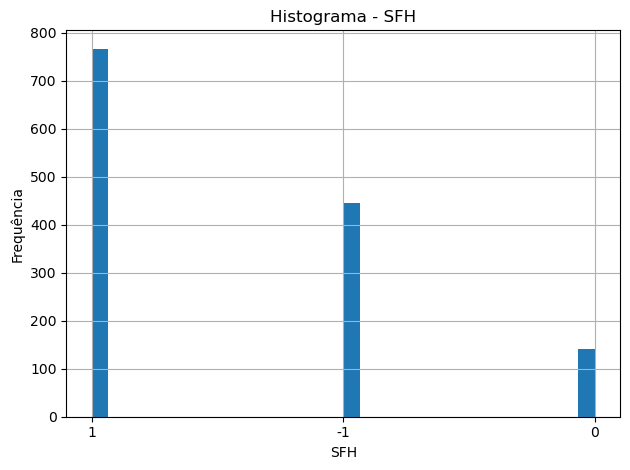

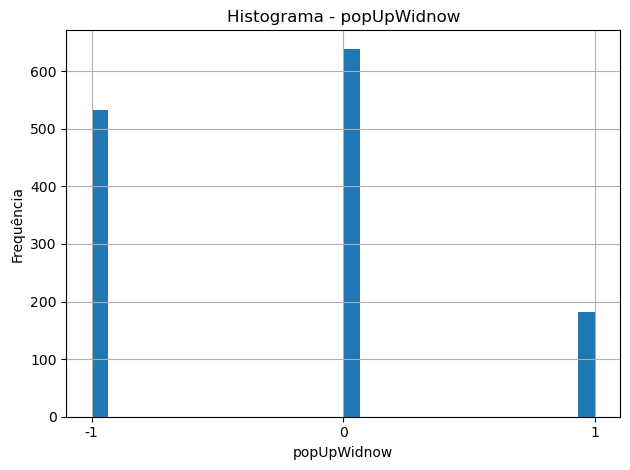

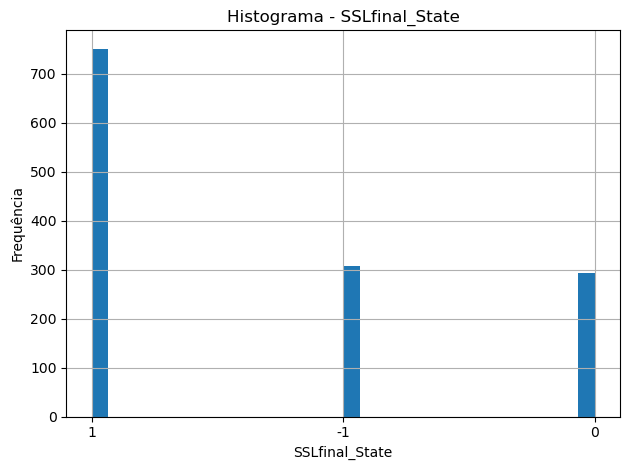

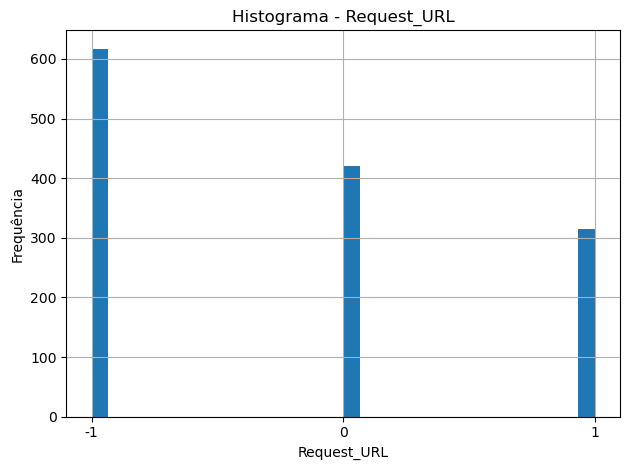

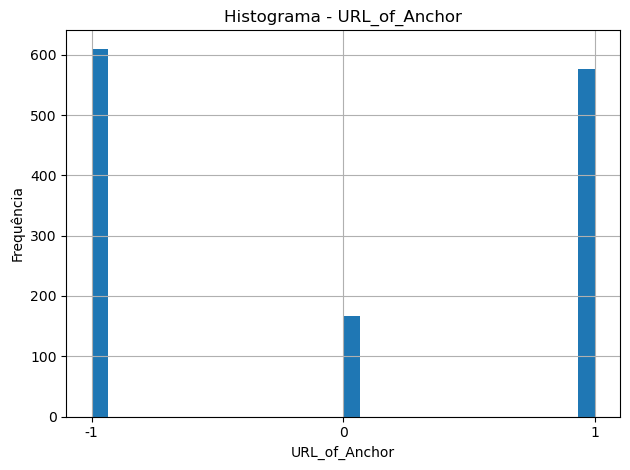

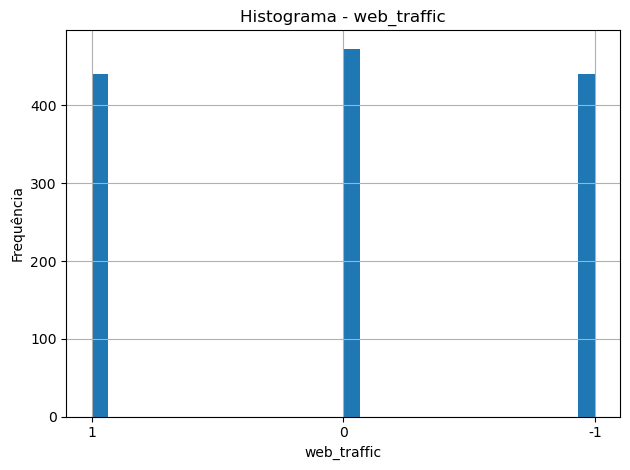

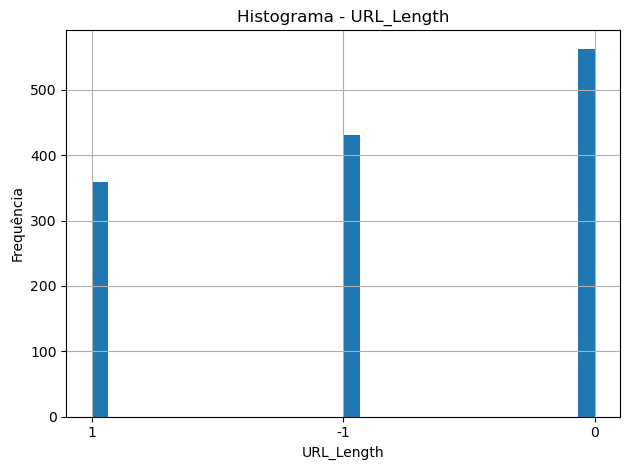

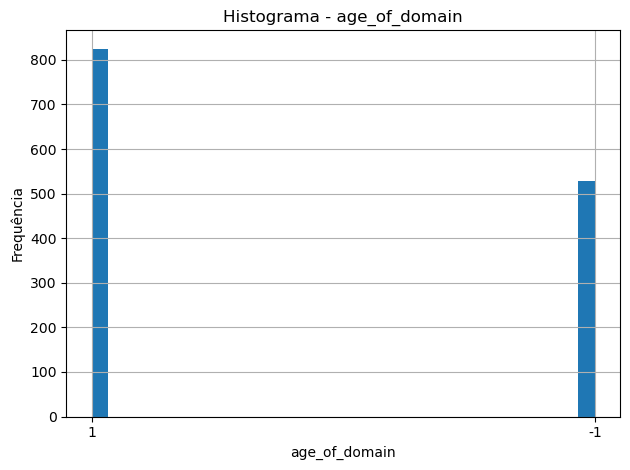

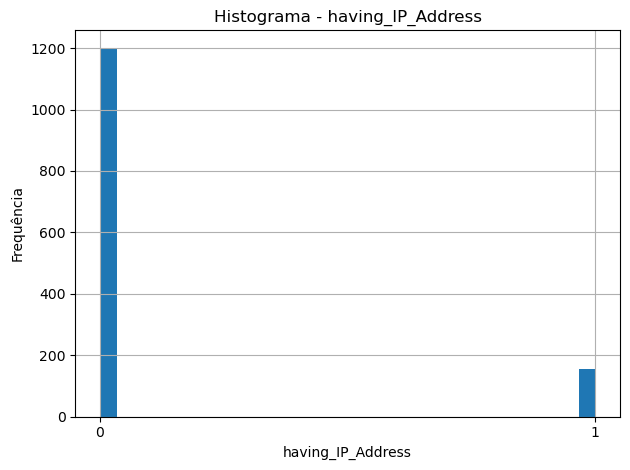

In [203]:
# Histograma das features 
features = df.columns[:-1]
for col in features:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histograma - {col}")
    plt.xlabel(col)
    plt.ylabel("Frequência")
    plt.tight_layout()
    plt.show()


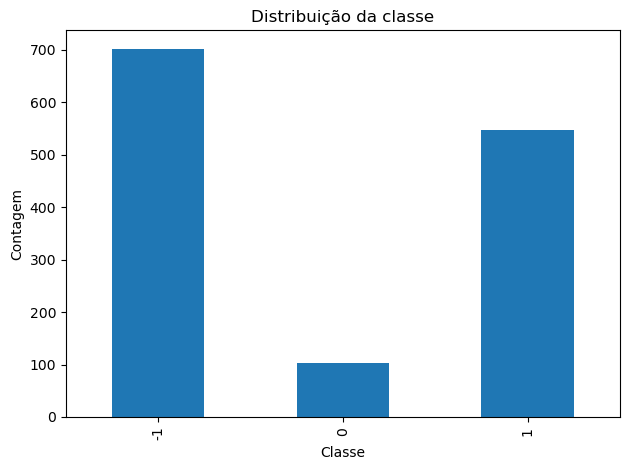

In [205]:
# Distribuição da classe
plt.figure()
df['class'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribuição da classe")
plt.xlabel("Classe")
plt.ylabel("Contagem")
plt.tight_layout()
plt.show()

/var/folders/37/0rq3kb_57y32ktqnrdcbdxg40000gn/T/ipykernel_47771/2017591778.py:6: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  plt.imshow(corr, interpolation='nearest', aspect='auto')
/var/folders/37/0rq3kb_57y32ktqnrdcbdxg40000gn/T/ipykernel_47771/2017591778.py:6: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(corr, interpolation='nearest', aspect='auto')


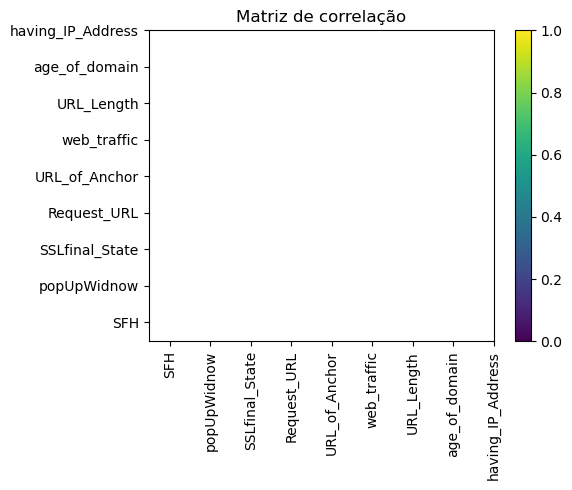

In [207]:
# Matriz de correlação das features numéricas
features = df.columns[:-1]
corr = df[features].corr(numeric_only=True)

plt.figure(figsize=(6,5))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.title('Matriz de correlação')
plt.colorbar()
plt.xticks(range(len(features)), features, rotation=90)
plt.yticks(range(len(features)), features)
plt.tight_layout()
plt.show()


### 3) Preparação dos dados e seleção de 3 classificadores

In [211]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1].astype(str)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

modelos = {
    'LogisticRegression': LogisticRegression(max_iter=2000),
    'RandomForest': RandomForestClassifier(random_state=42),
    'SVC': SVC()
}
modelos


{'LogisticRegression': LogisticRegression(max_iter=2000),
 'RandomForest': RandomForestClassifier(random_state=42),
 'SVC': SVC()}

### 4) Treino e Comparação por métricas (acurácia, precisão, recall, F1)


 LogisticRegression
              precision    recall  f1-score   support

          -1       0.86      0.90      0.88       211
           0       0.50      0.10      0.16        31
           1       0.84      0.92      0.88       164

    accuracy                           0.85       406
   macro avg       0.73      0.64      0.64       406
weighted avg       0.83      0.85      0.83       406



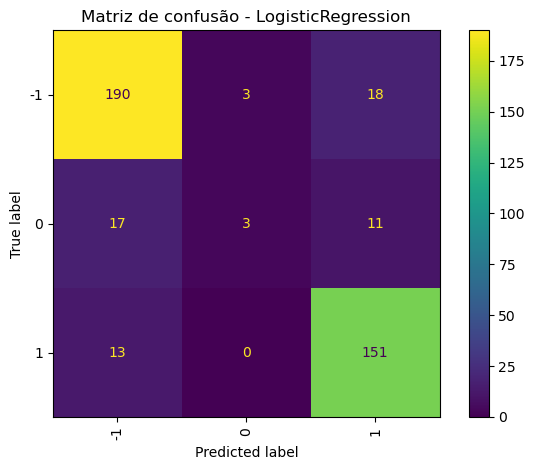


 RandomForest
              precision    recall  f1-score   support

          -1       0.91      0.91      0.91       211
           0       0.88      0.71      0.79        31
           1       0.87      0.90      0.88       164

    accuracy                           0.89       406
   macro avg       0.89      0.84      0.86       406
weighted avg       0.89      0.89      0.89       406



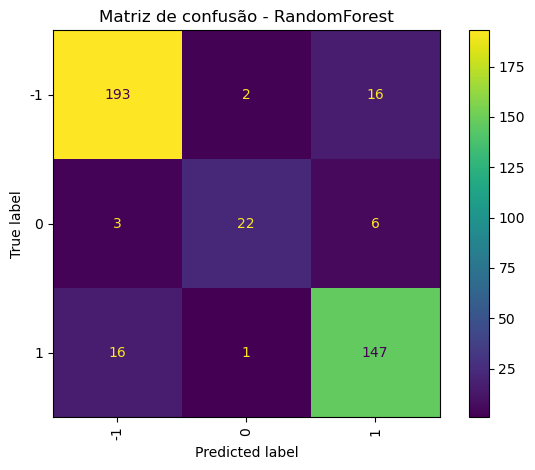


 SVC
              precision    recall  f1-score   support

          -1       0.90      0.92      0.91       211
           0       0.80      0.26      0.39        31
           1       0.83      0.92      0.88       164

    accuracy                           0.87       406
   macro avg       0.85      0.70      0.73       406
weighted avg       0.87      0.87      0.86       406



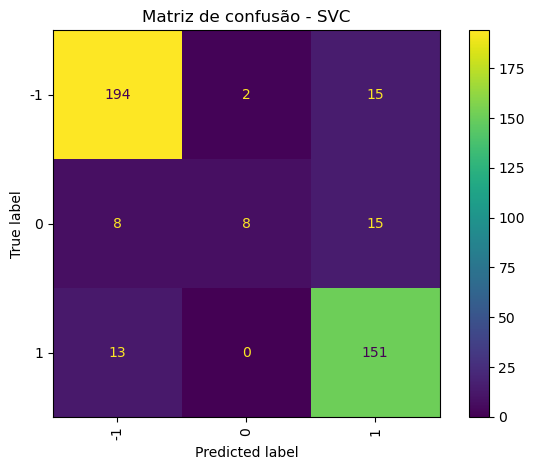

,Modelo,Accuracy,Precision,Recall,F1
1,RandomForest,0.891626,0.886733,0.840237,0.860376
2,SVC,0.869458,0.845527,0.699409,0.725468
0,LogisticRegression,0.847291,0.734175,0.639327,0.640580


In [216]:
resultados = []

for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    resultados.append([nome, acc, prec, rec, f1])

    print(f"\n {nome}")
    print(classification_report(y_test, y_pred, zero_division=0))

    labels = sorted(y.unique())
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(xticks_rotation=90)
    plt.title(f"Matriz de confusão - {nome}")
    plt.tight_layout()
    plt.show()

df_resultados = pd.DataFrame(resultados, columns=['Modelo','Accuracy','Precision','Recall','F1'])
display(df_resultados.sort_values('F1', ascending=False))


### 6) Gráficos de barra — comparação por métrica

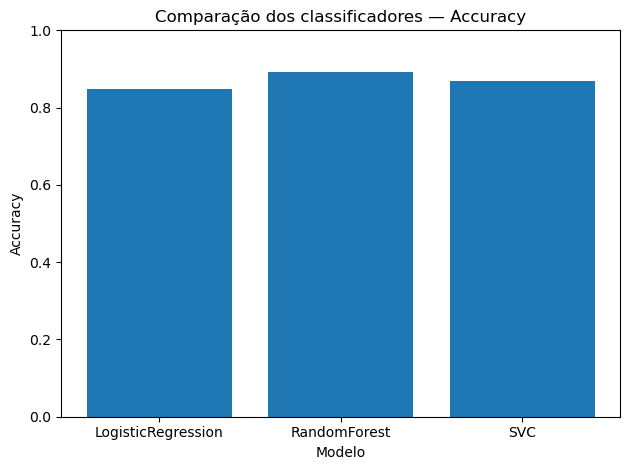

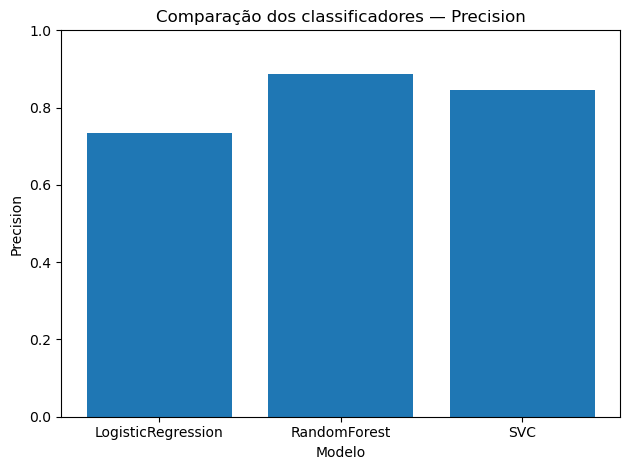

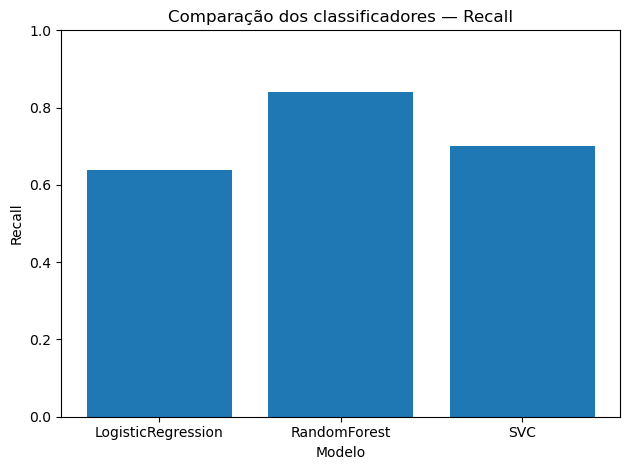

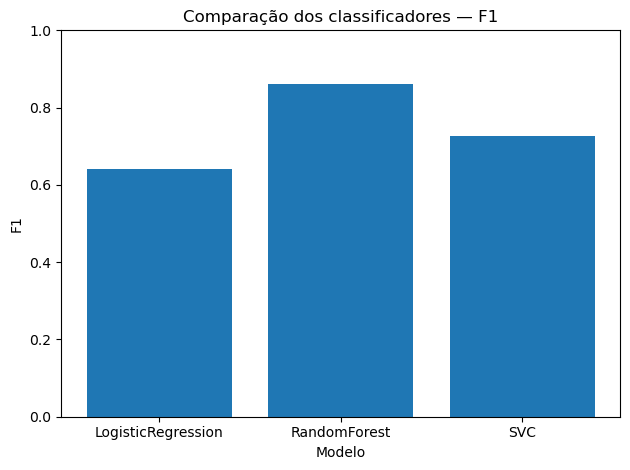

In [221]:
metricas = ['Accuracy','Precision','Recall','F1']
for m in metricas:
    plt.figure()
    plt.bar(df_resultados['Modelo'], df_resultados[m])
    plt.title(f"Comparação dos classificadores — {m}")
    plt.xlabel("Modelo")
    plt.ylabel(m)
    plt.xticks(rotation=0)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


### 7) Seleção de características (SelectKBest + mutual_info) e reavaliação

In [224]:
k = max(1, X.shape[1] // 2)
selector = SelectKBest(mutual_info_classif, k=k)
X_train_fs = selector.fit_transform(X_train, y_train)
X_test_fs = selector.transform(X_test)

scaler_fs = StandardScaler()
X_train_fs = scaler_fs.fit_transform(X_train_fs)
X_test_fs = scaler_fs.transform(X_test_fs)

resultados_fs = []
for nome, modelo in modelos.items():
    modelo.fit(X_train_fs, y_train)
    y_pred = modelo.predict(X_test_fs)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    resultados_fs.append([nome, acc, prec, rec, f1])

df_resultados_fs = pd.DataFrame(resultados_fs, columns=['Modelo','Accuracy','Precision','Recall','F1'])
display(df_resultados_fs.sort_values('F1', ascending=False))


,Modelo,Accuracy,Precision,Recall,F1
2,SVC,0.864532,0.907793,0.634303,0.618218
1,RandomForest,0.859606,0.739387,0.631143,0.615047
0,LogisticRegression,0.820197,0.545452,0.593978,0.567848


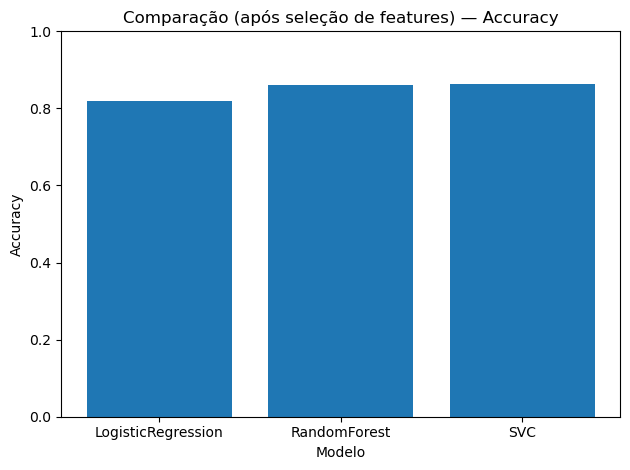

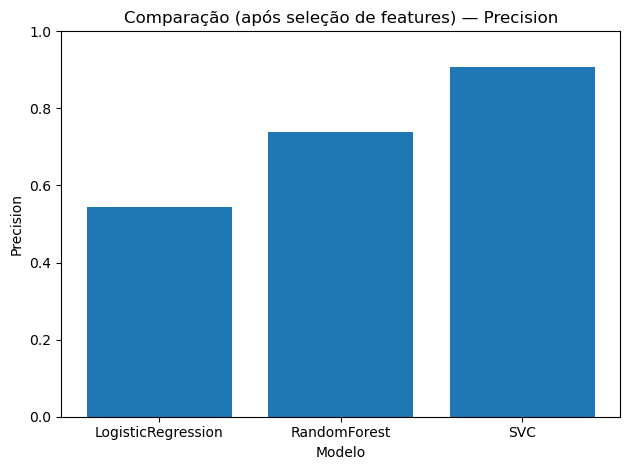

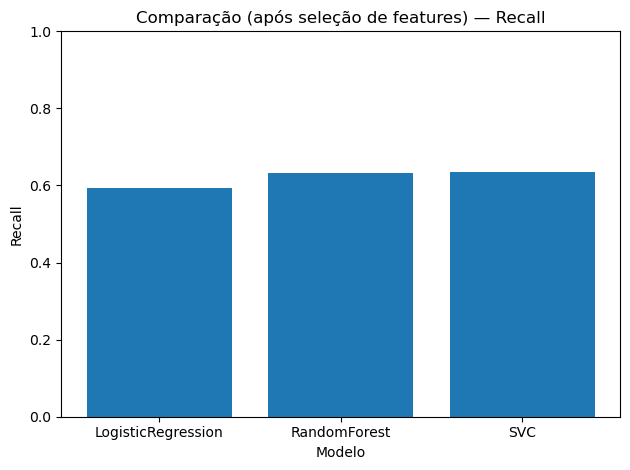

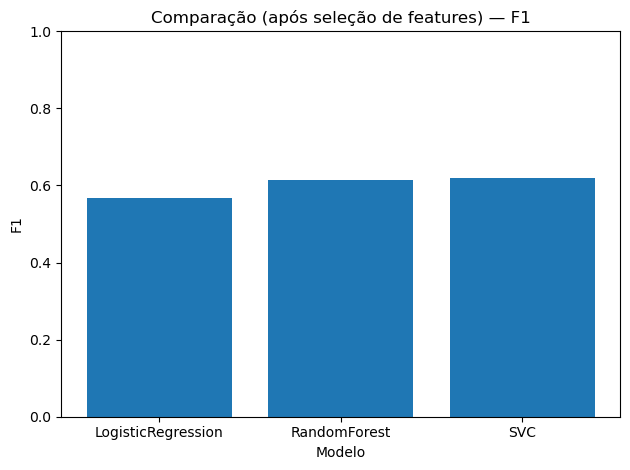


### Observações finais
- As médias *macro* tratam as classes de forma uniforme (útil quando há desbalanceamento).
- A seleção de características pode melhorar (ou não) as métricas; compare os gráficos.
- Ajuste `k` em `SelectKBest` e hiperparâmetros dos modelos para investigar melhorias.